In [1]:
# Original code written for diabetes analysis by: 
# Ameen Abdel Hai 
# Marija Stanojevic 
# Branimir Ljubic

In [2]:
import csv
import pandas as pd
import sys

**Negative and Positive Cohort**

Psotive and Negative cohort. 1 to 1 ratio (50% positive and 50% negative)

Basically, create a new file that contains patients who were diagnosed with diabetes and other specific 
diseases listed in diseases list.

@Input file: indexed data excludes procedures. All patients in this file are diabetics <br/>
@Output file:  a new file that contains patients who developed certain disease after 4 visits

In addition, this file also keeps track of patients IDS who are positive, such that we can take
negative patients by making sure the ID is not in the list of patients who tested positive
<hr/>
First, create two seperate files for positive and negative, then, take all positive patients and the same number from the negative patients

In [3]:
# D_427 -> 30 AFib
# D_434 -> 158 Stroke
# D_428 -> 5 heart failure
# D_425 -> 78 cardiomyopathy

diseases = ["158"]
diseases_count = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
patient_ids_with_positive_cohort = []
output_file = 'HCUP_indexed_positive.csv'

csv_positive_cohort = open(output_file, mode='w')

file = 'HCUP_indexed_ex_procedures.csv'
with open(file) as csv_file:
    for line in csv_file:    
        row = line.split(',')

        for x in range(0, len(row)):
            
            # primary diagnosis
            if row[x] == '30': # 3 -> diabetes/D_250
                i = x
                data = row[i:] 
                # print(data)
                c = 0
                for i in range(0, len(data)):
                    if '#' in data[i]:
                        c+=1
                    if c == 4: # number of visits between
                        data_2 = data[:i]
                        data_3 = data[i:]
                        for j in range(len(diseases)):
                            for x in data_3:
                                
                                if '#' in x: x = x.split('#')[0]
                                
                                if diseases[j] == x:
                                    
                                    flag = False
                                    for y in data_2:
                                        if diseases[j] == y:
                                            flag = True
                                            break
                                    if not flag:
                                        diseases_count[j] += 1
                                        csv_positive_cohort.write(line) 
                                        patient_id = line.split('|')[0]
                                        patient_ids_with_positive_cohort.append(patient_id) # to keep track
                                        break        
                                    
                        break
                break

        
csv_positive_cohort.close()
print(diseases_count)

[41044, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Now, we have a dataset that contains all positive patients. 
Lets create a file with patients/diabetics who do not have specific disease (negative/0)

In [4]:
# Get negative cohort for med_code: D_413/index: 107
out_file = 'HCUP_indexed_negative.csv'
negative_cohort_file = open(out_file, mode='w')


with open(file, mode='r') as input_file:
    for row in input_file:
        patient_id = row.split('|')[0]
        # if patient id is not in the list of positive, then negative
        if patient_id not in patient_ids_with_positive_cohort: 
            negative_cohort_file.write(row)

negative_cohort_file.close()
print("done")

done


Test and count how many negative and positive patients there are 
take all positive patients and same number of patients from negative

In [5]:
# Test data-set
file = 'HCUP_indexed_positive.csv'
counter = 0
with open(file) as test_data:
    for row in test_data:
        counter+=1
print(counter)

# Test data-set
file = 'HCUP_indexed_negative.csv'
counter = 0
with open(file) as test_data:
    for row in test_data:
        #print(row)
        counter+=1
print(counter)

41044
3685304


Now, we have two different datasets. Positive and negative patients

Create a new file that contains 1 to 1 ratio - 50/50 balanced data

In [6]:
# 1 to 1 ratio - 50/50 - balanced data
file = 'HCUP_1_to_1.csv'
new_csv = open(file, mode='w')
input_file = 'HCUP_indexed_positive.csv'

counter = 0
with open(input_file, mode='r') as data:
    for row in data:
        counter += 1
        new_csv.write(row)
new_csv.close()
print('rows written', counter)
NUMPOS = counter
# first 21631 are positive

rows written 41044


In [7]:
# 1 to 1 ratio - 50/50 - balanced data
file = 'HCUP_1_to_1.csv'
new_csv = open(file, mode='a')
input_file = 'HCUP_indexed_negative.csv'

counter = 0
with open(input_file, mode='r') as data:
    for row in data:
        if counter == NUMPOS: break
        counter += 1
        new_csv.write(row)
new_csv.close()
# second 21631 are negative
print('rows written', counter)

rows written 41044


Test and count total number - should be 21631*2 = 43262

In [8]:
# Test data-set
file = 'HCUP_1_to_1.csv'
counter = 0
with open(file) as test_data:
    for row in test_data:
        # print(row)
        counter+=1
print(counter)
NUMTOT = counter

82088


<hr/>
<hr/>
<hr/>
<hr/>
<hr/>

Load med codes

In [9]:
codes_d = {}
file = 'disease_codes.csv'
with open(file) as input_data:
    for code in input_data:
        index = code.split(',')[0][2:-1]
        code = code.split(',')[1][1:-2]
        
        codes_d[code] = index

In [10]:
# lets take a look into the dict
print(len(codes_d))
for k, v in codes_d.items():
    print(k, '-->', v)


2350
1 --> D_402
2 --> D_424
3 --> D_250
4 --> D_416
5 --> D_428
6 --> D_852
7 --> D_276
8 --> D_782
9 --> D_401
10 --> D_780
11 --> D_285
12 --> D_518
13 --> D_507
14 --> D_038
15 --> D_995
16 --> D_907
17 --> D_458
18 --> D_692
19 --> D_263
20 --> D_438
21 --> D_787
22 --> D_482
23 --> D_584
24 --> D_599
25 --> D_008
26 --> D_799
27 --> D_560
28 --> D_486
29 --> D_578
30 --> D_427
31 --> D_553
32 --> D_262
33 --> D_041
34 --> D_997
35 --> D_585
36 --> D_403
37 --> D_536
38 --> D_294
39 --> D_151
40 --> D_491
41 --> D_571
42 --> D_272
43 --> D_456
44 --> D_572
45 --> D_303
46 --> D_453
47 --> D_280
48 --> D_496
49 --> D_300
50 --> D_296
51 --> D_501
52 --> D_185
53 --> D_515
54 --> D_305
55 --> D_789
56 --> D_600
57 --> D_595
58 --> D_530
59 --> D_591
60 --> D_287
61 --> D_441
62 --> D_311
63 --> D_433
64 --> D_356
65 --> D_255
66 --> D_426
67 --> D_786
68 --> D_412
69 --> D_079
70 --> D_790
71 --> D_535
72 --> D_722
73 --> D_847
74 --> D_724
75 --> D_410
76 --> D_784
77 --> D_414
78 

750 --> D_868
751 --> D_445
752 --> D_953
753 --> D_210
754 --> D_894
755 --> D_956
756 --> D_637
757 --> D_254
758 --> D_988
759 --> D_502
760 --> D_194
761 --> D_387
762 --> D_629
763 --> D_902
764 --> D_390
765 --> D_190
766 --> D_930
767 --> D_589
768 --> D_874
769 --> D_013
770 --> D_230
771 --> D_114
772 --> D_732
773 --> D_833
774 --> D_957
775 --> D_184
776 --> D_939
777 --> D_460
778 --> D_960
779 --> D_313
780 --> D_886
781 --> D_142
782 --> D_087
783 --> D_505
784 --> D_929
785 --> D_004
786 --> D_869
787 --> D_046
788 --> D_734
789 --> D_983
790 --> D_985
791 --> D_938
792 --> D_097
793 --> D_140
794 --> D_635
795 --> D_187
796 --> D_976
797 --> D_854
798 --> D_164
799 --> D_093
800 --> D_901
801 --> D_018
802 --> D_946
803 --> D_055
804 --> D_145
805 --> D_024
806 --> D_090
807 --> D_143
808 --> D_234
809 --> D_325
810 --> D_264
811 --> D_393
812 --> D_683
813 --> D_928
814 --> D_217
815 --> D_051
816 --> D_993
817 --> D_163
818 --> D_640
819 --> D_940
820 --> D_982
821 --

5401 --> D_V659
5402 --> D_V041
5403 --> D_V882
5404 --> D_V788
5405 --> D_V400
5406 --> D_V595
5407 --> D_V592
5408 --> D_V591
5409 --> D_V259
5410 --> D_V059
5411 --> D_V613
5412 --> D_V483
5413 --> D_V771
5414 --> D_V488
5415 --> D_V410
5416 --> D_V508
5417 --> D_V679
5418 --> D_V725
5419 --> D_V284
5420 --> D_V522
5421 --> D_V429
5422 --> D_V289
5423 --> D_V708
5424 --> D_V032
5425 --> D_V722
5426 --> D_V593
5427 --> D_V192
5428 --> D_V479
5429 --> D_V700
5430 --> D_V693
5431 --> D_V671
5432 --> D_V473
5433 --> D_V184
5434 --> D_V559
5435 --> D_V789
5436 --> D_V047
5437 --> D_V212
5438 --> D_V449
5439 --> D_V676
5440 --> D_V524
5441 --> D_V239
5442 --> D_V193
5443 --> D_V534
5444 --> D_V590
5445 --> D_V220
5446 --> D_V529
5447 --> D_V778
5448 --> D_V494
5449 --> D_V574
5450 --> D_V490
5451 --> D_V475
5452 --> D_V777
5453 --> D_V051
5454 --> D_V816
5455 --> D_V518
5456 --> D_V288
5457 --> D_V261
5458 --> D_V413
5459 --> D_V729
5460 --> D_V415
5461 --> D_V015
5462 --> D_V021
5463 -->

10557 --> P_260
10558 --> P_720
10559 --> P_500
10560 --> P_174
10561 --> P_593
10562 --> P_515
10563 --> P_936
10564 --> P_924
10565 --> P_914
10566 --> P_600
10567 --> P_163
10568 --> P_671
10569 --> P_484
10570 --> P_703
10571 --> P_708
10572 --> P_217
10573 --> P_642
10574 --> P_644
10575 --> P_427
10576 --> P_670
10577 --> P_065
10578 --> P_940
10579 --> P_754
10580 --> P_243
10581 --> P_857
10582 --> P_084
10583 --> P_043
10584 --> P_783
10585 --> P_167
10586 --> P_917
10587 --> P_903
10588 --> P_643
10589 --> P_566
10590 --> P_687
10591 --> P_136
10592 --> P_755
10593 --> P_961
10594 --> P_945
10595 --> P_036
10596 --> P_558
10597 --> P_568
10598 --> P_740
10599 --> P_674
10600 --> P_825
10601 --> P_828
10602 --> P_245
10603 --> P_134
10604 --> P_137
10605 --> P_343
10606 --> P_261
10607 --> P_109
10608 --> P_290
10609 --> P_489
10610 --> P_704
10611 --> P_344
10612 --> P_320
10613 --> P_553
10614 --> P_715
10615 --> P_764
10616 --> P_829
10617 --> P_916
10618 --> P_221
10619 --

In [11]:
# count how many times a code occur per patient
file = 'HCUP_1_to_1.csv'
counter = 0

code_count = {}

patient_index = 1
with open(file) as test_data:
    for row in test_data:
        visits = row.replace('\n','').split('|')[2].split('#')
        for k in range(0,len(visits)):
            visit_codes = visits[k].split(',')[1:]
            # print(visit_codes)
            for v in visit_codes:
                code_count[v] = code_count.get(v, 0) + 1
   

In [ ]:
print('afib:', code_count['30'])
print('comp:', code_count[diseases[0]])

In [12]:
# Delete those medical codes from dataset 
keys_to_delete = []
counter = 0
for k, v in code_count.items():
     if v < 50 or v > 200000:
        counter += 1
        keys_to_delete.append(k)
        
print(counter)
# delete those codes from data-set 

441


In [13]:
# new medical codes is a dict that exludes codes that we wanted to delete
counter = 0
new_med_codes = {}
for k, v in codes_d.items():
    if k in keys_to_delete:
        continue
    new_med_codes[k] = v

In [14]:
# delete procedures from new_med_codes
med_codes_without_procedures = {}
for k, v in new_med_codes.items():
    if v.startswith("P_"):
        continue
    med_codes_without_procedures[k] = v

In [15]:
# Create a new medical codes file - Code and its index
import operator

codes_file = open('disease_codes_v2.csv', 'w')

for k, v in med_codes_without_procedures.items():
    codes_file.write('(\'' + v + '\', ' + k + ")\n")
codes_file.close() 

In [16]:
# create a new file that excludes medical codes to delete
new_file = 'HCUP_1_to_1_v2.csv'

new_csv = open(new_file, mode='w')

file = 'HCUP_1_to_1.csv'

with open(file) as input_file:
    for line in input_file:
        front = line.replace('\n', '').split('|')[:2]
        visits = line.replace('\n','').split('|')[2].split('#')
        new_visits = []
        
        for visit in visits:
            link_and_age = visit.split(',')[:2]
            med_codes = visit.split(',')[2:]
            new_codes = []
            
            for med_code in med_codes:
                # med_code is not '-99' and
                 if med_code in med_codes_without_procedures:
                    new_codes.append(str(med_code))
            new_visits.append(','.join(link_and_age + new_codes))
        new_csv.write('|'.join(front) + '|' + '#'.join(new_visits) + '\n')
new_csv.close()

In [17]:
# Test data-set
file = 'HCUP_1_to_1_v2.csv'
counter = 0
with open(file) as test_data:
    for row in test_data:
        # print(row)
        counter+=1
print(counter)

82088


<hr/>
<hr/>
<hr/>
<hr/>
<hr/>

**MAKE AMENDMENT**

For those patients who were tested positive, remove visits after that contain the certain complication we are looking for and after
and for those who were tested negative, leave the length as it is

In [18]:
# Cut positive patients such that we only have the row from 0 until we find the medical code of the required complication 

file = 'HCUP_1_to_1_v2.csv'
out_file = 'HCUP_1_to_1_v3.csv'
new_csv = open(out_file, mode = 'w')
counter = 0

with open(file, mode='r') as csv_file:
    for line in csv_file:
        if counter < NUMPOS:
            counter += 1
            front = line.replace('\n', '').split('|')[:2]
            visits = line.replace('\n','').split('|')[2].split('#')

            index = 0
            for v in visits:
                index+=1
                if diseases[0] in v:
                    new_csv.write('|'.join(front) + '|' + '#'.join(visits[0:index-1]) + '\n')
                    break
        else:
            new_csv.write(line) 
new_csv.close()

In [19]:
# Test data-set
file = 'HCUP_1_to_1_v3.csv'
counter = 0
with open(file) as test_data:
    for row in test_data:
        # print(row)
        counter+=1
print(counter)

82088


In [20]:
# Checks avg number of visits per patients for positive and negative class to make sure we are not biased

file = 'HCUP_1_to_1_v3.csv'

avg_len_pos = 0
avg_len_neg = 0

counter = 0
with open(file, mode='r') as csv_file:
    for line in csv_file:
        if counter < NUMPOS:
            avg_len_pos += line.count("#")
        else:
            avg_len_neg += line.count("#")
        counter += 1
print(avg_len_pos / NUMTOT)
print(avg_len_neg / NUMTOT)
        

3.149108274047364
2.824261767858883


In [21]:
###### added in ###### Wilson
# this block calculates days between visits

days = []
count = 0
with open('HCUP_1_to_1_v3.csv') as csv_file:
    for line in csv_file:
        visits = line.replace('\n','').split('|')[2].split('#')
        #print(visits)
        if visits[0].split(',')[0] != '':
            initialDate = int(visits[0].split(',')[0])
        else:
            days.append(0)
            continue
        for visit in visits:
            currentDate = int(visit.split(',')[0])
            if currentDate < initialDate:
                days.append(-1)
                continue
            days.append(int(visit.split(',')[0]) - initialDate)

In [22]:
# creates matrix where rows are visits containing all the diseases padded with zeros

list_of_visits = []

indexed_data = 'HCUP_1_to_1_v3.csv'
with open(indexed_data) as input_data:
    cnt_visits = 0
    seen = set()
    index = 0
    for row in input_data:
        visits = row.replace('\n','').split('|')[2].split('#')
        for visit in visits:
            cnt_visits += 1
            v = list(map(int, visit.split(',')[2:]))
            v.sort()
            v.extend([0] * (26 - len(v)))
            v = tuple(v)
            if v not in seen:
                seen.add(v)
                index += 1
                
    list_of_visits = [list(x) for x in seen]
    print(list_of_visits[:5])

[[38, 52, 270, 507, 5010, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [24, 29, 41, 44, 54, 86, 209, 209, 5010, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [36, 37, 68, 92, 333, 5013, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [23, 35, 36, 279, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [14, 15, 17, 24, 35, 159, 5038, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


In [23]:
# load medical codes
codes_d = {}
file = 'disease_codes_v2.csv'
with open(file) as input_data:
    index = 0
    for code in input_data:
        code = code.split(',')[1][1:-2]
        codes_d[code] = index
        index +=1 
#print(codes_d)

In [24]:
# create Frequency Matrix
# creates matrix where rows are visits and columns are diseases codes and values are frequnces for each disease in each visit
freq_matrix = []
for i in range(len(list_of_visits)):
    freq_matrix.append([0] * 1023)

for i in range(len(list_of_visits)):
    for j in range(len(list_of_visits[0])):
        if list_of_visits[i][j] != 0:
            k = codes_d[str(list_of_visits[i][j])]
            freq_matrix[i][k] += 1

In [25]:
# runs SVD on freq_matrix
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=50)
visits_emb = svd.fit_transform(freq_matrix)
print(len(visits_emb), len(visits_emb[0]))

391131 50


In [26]:
# patients visits
patients_visits = []

indexed_data = 'HCUP_1_to_1_v3.csv'
with open(indexed_data) as input_data:
    for row in input_data:
        v_codes = []
        visits = row.replace('\n','').split('|')[2].split('#')
        for visit in visits:
            v = list(map(int, visit.split(',')[2:]))
            v.sort()
            v.extend([0] * (26 - len(v)))
            v_codes.append(list_of_visits.index(v))
        patients_visits.append(v_codes)

print(len(patients_visits), len(patients_visits[2]))

82088 6


In [28]:
# change a matrix which rows are patients and col contains concatenated feature vectors of that patients visits
rnn_input = []
for i in range(NUMTOT):    # total num patients
    rnn_input.append([0] * 2500)
    
for i in range(len(patients_visits)):
    for j in range(len(patients_visits[i])):
        rnn_input[i][50 * j: 50 * (j + 1)] = visits_emb[patients_visits[i][j]]

In [29]:
###### added in ###### Wilson
# adds in time component (days between visits)

count = 0
for i in range(len(rnn_input)): #for each patient
    for j in range(49, len(rnn_input[i]), 50): #replace every 50th component
        if rnn_input[i][j] == 0:
            count += 1
            break
        rnn_input[i][j] = float(days.pop(0))

MAKE SURE LENGTH OF ALL ROWS ARE 2500

In [30]:
# write rnn_input to csv file
file = 'HCUP_rnn_input.csv'

with open(file, "w", newline="") as new_csv_file:
    writer = csv.writer(new_csv_file)
    for row in rnn_input:
        writer.writerow(row)

In [31]:
# Take a peak into the new written file for testing purposes
file = 'HCUP_rnn_input.csv'

with open(file) as new_csv_file:
    for line in new_csv_file:
        data = line.split(',')
        print((line))        
        break

0.8172627606120766,-0.3201353586745673,0.3990109814850322,-0.41013979944981277,-0.3845260982381059,-0.20049886453548124,0.7671641450681199,-0.012781881788755878,-0.33121462236412147,-0.24757461798676814,0.098661408744589,-0.544055590224051,0.6089529839839319,-0.12683212542343678,0.00808232927999159,-0.04651590927377762,-0.000993406670399451,0.09866666631456723,-0.11864644869541183,-0.27629833627394085,0.4813621708212182,0.523645024292566,-0.3412204331444394,-0.1484851438392187,-0.3284523873250529,-0.09729445447440135,-0.07438092112618672,-0.25386385122010857,0.3493712349295545,-0.028304561581628494,-0.09095917477943313,-0.24283948445281797,0.12989067478366007,-0.100712672703289,0.0031929860985807474,0.0024455077657307006,0.10191510535756788,-0.12835499170913467,0.008225126795285068,-0.46711108173543947,-0.19043775731351725,0.09179826939503295,1.1328521805927816,-0.37507831734356556,0.1315909574926589,0.6769656400265349,-0.26686051230878544,-0.2778221478464286,-0.4562527536213901,0.0,0.

**Finally, Machine Learning!**

<hr/>
RNN 
<hr/>

In [32]:
#Import necessary libraries 
from __future__ import print_function
from keras.callbacks import LambdaCallback
#from keras.models import Sequential
#from tensorflow.keras.models import Sequential
# from keras.layers import Dense, Activation
# from keras.layers import LSTM
from keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
import numpy as np
import random
import sys
import io
import numpy as np
import pandas as pd

import random
from matplotlib import pyplot as plt
#plt.style.use('dark_background')
from keras.models import Model
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, GlobalMaxPooling1D, SpatialDropout1D, GRU, Bidirectional, Input, TimeDistributed, Reshape

Using TensorFlow backend.


In [33]:
# load data
rnn_input = []
file = 'HCUP_rnn_input.csv'
with open(file) as input_data:
    for row in input_data:
        row = row.replace('\n','').split(',')
        rnn_input.append(row)

In [34]:
# change dtype to float
for r in range(0, len(rnn_input)):
    for c in range(0, len(rnn_input[r])):
        rnn_input[r][c] = float(rnn_input[r][c])
print(type(rnn_input[0][0]))

<class 'float'>


In [35]:
#print((rnn_input[0]))
y = [1 if i < NUMPOS else 0 for i in range(NUMTOT)]
print(len(y))
print(len(rnn_input))

82088
82088


In [36]:
# 80% training
X = rnn_input
# X = encoded
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = 0.2, random_state = 42)
print(len(X_train), 'training')
print(len(X_test), 'testing')

65670 training
16418 testing


Bidirectional GRU

In [37]:
# Random search drop out rate and number of units/neurons
X_train = np.array(X_train)
X_test = np.array(X_test)
input_shape = (X_train.shape[1], 1)

units = 128


model = Sequential()
model.add(Reshape((50, 50), input_shape=(2500,)))
# 1 sees the past 
# 2 sees the past and the future

dropout = .2
print('Number of hidden units: ', units, 'Dropout: ', dropout)
model.add(Bidirectional(GRU(units, input_shape=input_shape))) # 64, $128$, 256, 512
model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
print('Training...')
history = model.fit(
    np.array(X_train),
    np.array(y_train),
    batch_size = 128, 
    epochs = 8,
    validation_split = 0.1
)

print(model.evaluate(np.array(X_test), y_test), "\n\n")

Number of hidden units:  128 Dropout:  0.2
Training...
Train on 59103 samples, validate on 6567 samples
Epoch 1/8
59103/59103 [==============================] - 2020s 34ms/step - loss: 0.6115 - accuracy: 0.6640 - val_loss: 0.5741 - val_accuracy: 0.7067
Epoch 2/8
59103/59103 [==============================] - 1859s 31ms/step - loss: 0.5710 - accuracy: 0.7074 - val_loss: 0.5658 - val_accuracy: 0.7101
Epoch 3/8
59103/59103 [==============================] - 1766s 30ms/step - loss: 0.5532 - accuracy: 0.7213 - val_loss: 0.5431 - val_accuracy: 0.7296
Epoch 4/8
59103/59103 [==============================] - 1739s 29ms/step - loss: 0.5392 - accuracy: 0.7321 - val_loss: 0.5312 - val_accuracy: 0.7364
Epoch 5/8
59103/59103 [==============================] - 1716s 29ms/step - loss: 0.5282 - accuracy: 0.7393 - val_loss: 0.5149 - val_accuracy: 0.7500
Epoch 6/8
59103/59103 [==============================] - 1695s 29ms/step - loss: 0.5232 - accuracy: 0.7442 - val_loss: 0.5270 - val_accuracy: 0.7417
Ep

In [38]:
from sklearn.metrics import confusion_matrix
predictions = [i[0] for i in model.predict_classes(X_test)]

tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

print("Sensitivity: ", str(tp/(tp+fn)), '\n')
print('Specificity:', str(tn/(tn+fp)), '\n')

Sensitivity:  0.7693150018250395 

Specificity: 0.7208196121478229 



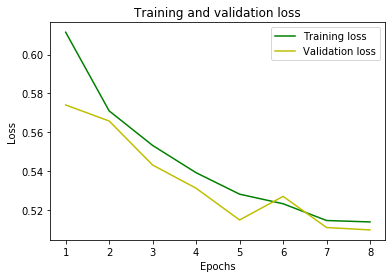

In [39]:
plt.clf()
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

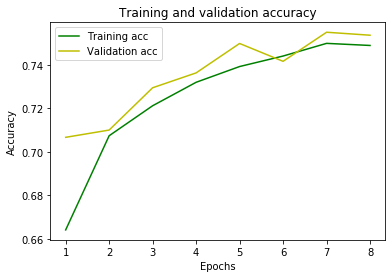

In [40]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1) #?
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'y', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

LSTM

In [41]:
# try 1 way LSTM
# Random search drop out rate and number of units/neurons
X_train = np.array(X_train)
X_test = np.array(X_test)
input_shape = (X_train.shape[1], 1)

units = 128


model = Sequential()
model.add(Reshape((50, 50), input_shape=(2500,)))
# 1 sees the past 
# 2 sees the past and the future
dropout = .19 
print('Number of hidden units: ', units, 'Dropout: ', dropout)
model.add(LSTM(units, input_shape=input_shape)) # 64, $128$, 256, 512
model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
print('Training...')
history = model.fit(
    np.array(X_train),
    np.array(y_train),
    batch_size = 128, 
    epochs = 8,
    validation_split = 0.1
)

print(model.evaluate(np.array(X_test), y_test), "\n\n")

Number of hidden units:  128 Dropout:  0.19
Training...
Train on 59103 samples, validate on 6567 samples
Epoch 1/8
59103/59103 [==============================] - 955s 16ms/step - loss: 0.6397 - accuracy: 0.6352 - val_loss: 0.6147 - val_accuracy: 0.6770
Epoch 2/8
59103/59103 [==============================] - 1010s 17ms/step - loss: 0.5876 - accuracy: 0.6957 - val_loss: 0.5741 - val_accuracy: 0.6874
Epoch 3/8
59103/59103 [==============================] - 1014s 17ms/step - loss: 0.5575 - accuracy: 0.7152 - val_loss: 0.5246 - val_accuracy: 0.7437
Epoch 4/8
59103/59103 [==============================] - 1007s 17ms/step - loss: 0.5302 - accuracy: 0.7349 - val_loss: 0.5117 - val_accuracy: 0.7483
Epoch 5/8
59103/59103 [==============================] - 1008s 17ms/step - loss: 0.5158 - accuracy: 0.7451 - val_loss: 0.5441 - val_accuracy: 0.7265
Epoch 6/8
59103/59103 [==============================] - 1016s 17ms/step - loss: 0.5095 - accuracy: 0.7502 - val_loss: 0.5089 - val_accuracy: 0.7547
Ep

In [42]:
predictions = [i[0] for i in model.predict_classes(X_test)]

tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

print("Sensitivity: ", str(tp/(tp+fn)), '\n')
print('Specificity:', str(tn/(tn+fp)), '\n')

Sensitivity:  0.802287382893296 

Specificity: 0.7022807659470667 



We can plot the training and validation accuracy and loss at each epoch by using the history variable returned by the fit function.

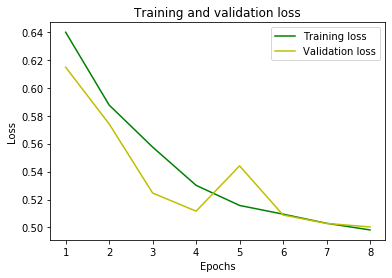

In [43]:
plt.clf()
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

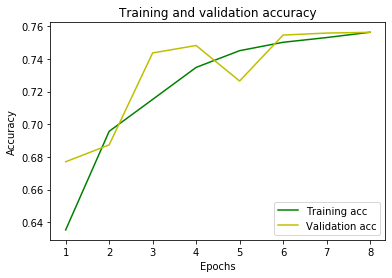

In [44]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1) #?
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'y', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<hr/>
Classification Using SKlearn - Traditional ML Algorithms
<hr/>

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets 
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from time import time

h = .02  # step size in the mesh

names = ["Random Forest", "MLP"]

classifiers = [
    RandomForestClassifier(max_depth=10, n_estimators=100),
    MLPClassifier()
]

print("{0:20}{1:40}\n-----------------------------------------------------".\
      format("Classifier", "Accuracy"))

# iterate over classifiers
for name, clf in zip(names, classifiers):
    
    start_time = time()
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    end_time = time()
    print("{0:20}{1:40}{2:40}".format(name, str(score), (end_time - start_time)))

Classifier          Accuracy                                
-----------------------------------------------------
Random Forest       0.7265805822877329                                             67.07440233230591
MLP                 0.7407114143013765                                            1171.8693916797638
